## <font color=black>7. Outputs and ScreenShots. </font>

### <font color=black>Importing the required packages.</font>

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier
import pickle

import ssl
try:
	_create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
	pass
else:
	ssl._create_default_https_context = _create_unverified_https_context

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import models
from gensim.models.coherencemodel import CoherenceModel

#Representing wordcloud.
from wordcloud import WordCloud, STOPWORDS

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import get_ipython

#Ignoring warnings.
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore',category = DeprecationWarning)
np.random.seed(2019)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/Muralikrishna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Muralikrishna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## <font color=black>List for dividing Positive and Negative sentences.</font>

In [3]:
positive_sen = []
negative_sen = []
neutral_sen = []

## <font color=black>Building the classifier using NAIVEBAYES from TWITTER data.</font>

In [4]:
with open('train.json', 'r') as fp:
  cl = NaiveBayesClassifier(fp, format="json")
print("Sucessfully built the classifier ....")

Sucessfully built the classifier ....


## <font color=black>Accuracy of the Classifier.</font>

In [9]:
print("calculating the accuracy of classifier...")
with open('test.json', 'r') as test:
  print("classifier accuracy:")
  print(cl.accuracy(test,format="json"))

calculating the accuracy of classifier...
classifier accuracy:
0.7008


## <font color=black>Saving the Classifier using PICKLE.</font>

In [10]:
sentiment_classifier = open("classifier.pickle","wb")
print("Generating pickle file....")

print("Dumping pickle....")
pickle.dump(cl, sentiment_classifier)

sentiment_classifier.close()
print("Pickle file created.....")

Generating pickle file....
Dumping pickle....
Pickle file created.....


## <font color=black>Building the classifier using PICKLE file.</font>

In [11]:
with open("classifier.pickle", "rb") as classifier_f:
	cl = pickle.load(classifier_f)
classifier_f.close()
print("output for sample doc:")
print(cl.classify("i think he doesnt like me, but there is a chance that he can love me"))

output for sample doc:
neg


## <font color=black>"Classify" function will CATEGORIZE the Positive and Negative text.</font>

In [18]:
def classify(review):
	blob = TextBlob(review, classifier=cl)
	blob.lower()
	blob.correct()
	for sentence in blob.sentences:
		if sentence.classify() == "neg" and len(str(sentence)) > 3:
			negative_sen.append(str(sentence))
		elif sentence.classify() == "pos" and len(str(sentence)) > 3:
			positive_sen.append(str(sentence))
		else:
			if len(str(sentence)) > 3:
				neutral_sen.append(str(sentence))

## <font color=black>Loading Reviews from topic.csv (reviews file).</font>

In [2]:
print("loading reviews")
data = pd.read_csv('topic.csv', error_bad_lines=False);
data_text = data[['Reviews']]
data_text['index'] = data_text.index
documents = data_text
total_docs = len(documents)
print("Number of Reviews: " + str(total_docs))

loading reviews
Number of Reviews: 604


### <font color=black>NOTE: *We will consider each review as each document and will build the topic model*.</font>

## <font color=black>CLASSIFYING reviews with respect to sentences.</font>

In [19]:
print("classifying reviews...")
documents['Reviews'].map(classify)
print("reviews classified....")

classifying reviews...
reviews classified....


## <font color=black>STORING positive text in positive.txt file. </font>

In [21]:
print("Number of positive sentences: "+str(len(positive_sen)))
pos_str = ("").join(positive_sen)
file1 = open("positive.txt","w")
file1.writelines(pos_str) 
file1.close()
print("positive text file created....")

Number of positive sentences: 984
positive text file created....


## <font color=black>STORING Negative text in Negative.txt file. </font>

In [22]:
print("Number of negative sentences: "+str(len(negative_sen)))
neg_str = ("").join(negative_sen)
file2 = open("negative.txt","w")
file2.writelines(neg_str) 
file2.close()
print("negative text file created....")

Number of negative sentences: 1481
negative text file created....


## <font color=black>STORING Neutral text in Neutral.txt file. </font>

In [23]:
print("Number of neutral sentences: "+str(len(neutral_sen)))
neu_str = ("").join(neutral_sen)
file2 = open("neutral.txt","w")
file2.writelines(neu_str) 
file2.close()
print("neutral text file created....")

Number of neutral sentences: 0
neutral text file created....


## <font color=black>"get_classfied_files" function READS the file and returns whole text as ONE STRING.</font>

In [3]:
def get_classfied_files(filename):
    unseen_document = ""
    for line in open(filename, 'r'):
        unseen_document = unseen_document+""+line
    return unseen_document

## <font color=black>LOADING Positive and Negative text.</font>

In [4]:
pos_str = get_classfied_files("positive.txt")
neg_str = get_classfied_files("negative.txt")
print("loaded files successfully.. ")

loaded files successfully.. 


## <font color=black>"preprocess" function, removes STOPWORDS, PUNCTUATION, STEMMING the words, LEMMATIZING the words, removes words less than 3 (Length of the word) from the reviews.|</font>

In [5]:
def preprocess(text):
	result = []
	for token in gensim.utils.simple_preprocess(text):
		if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
			result.append(lemmatize_stemming(token))
	return result


## <font color=black>LEMMATIZING and STEMMING the word</font>

In [6]:
def lemmatize_stemming(text):
	stemmer = PorterStemmer()
	return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='a'))

## <font color=black>PREPROCESSING all reviews.</font>

In [7]:
processed_docs = documents['Reviews'].map(preprocess)
processed_docs[0:5]

0              [like, phone, unfortun, tmobil, return]
1                  [love, fast, slim, sleek, slipperi]
2    [product, defect, plug, charg, thought, gonna,...
3               [happi, cell, phone, beauti, friendli]
4    [phone, month, decid, complet, quit, work, mid...
Name: Reviews, dtype: object

## <font color=black>Creating dictionary from PREPROCESSED documents.</font>

In [8]:
dictionary = gensim.corpora.Dictionary(processed_docs)
print("Unique words are generated from the Preprocess Documents..")
print("Number of unique words: "+str(len(dictionary)))

Unique words are generated from the Preprocess Documents..
Number of unique words: 1744


## <font color=black>Creating the WORDCLOUD to remove unnecessary words.</font>

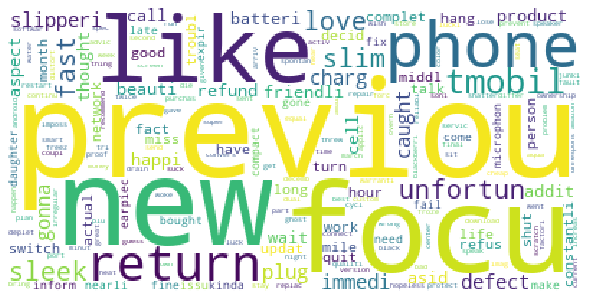

In [34]:
words = ' '
stopwords =set(STOPWORDS) 
stopwords = []
for k,v in dictionary.iteritems():
	words = words + v + ' '
wordcloud = WordCloud(width = 400, height = 200,background_color ='white',stopwords = stopwords,min_font_size = 5).generate(words)
	#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

## <font color=black>LISTING the word ID's of unnecessary words.</font>

In [9]:
del_list = ["galaxi","iphon","samsung","soni","xperia","month","love","time","problem","like","good","great"]
del_ids = [k for k,w in dictionary.items() if w in del_list]
print("Number of unique words after ID filtering: "+str(len(dictionary)))

Number of unique words after ID filtering: 1744


## <font color=black>FILTERING the dictionary using ID's as well as coverage of words in the documents (REVIEWS).</font>

In [10]:
dictionary.filter_tokens(bad_ids=del_ids)
dictionary.filter_extremes(no_below=70, no_above=0.2, keep_n=1700)
print("Final  of unique words: "+str(len(dictionary)))
print()
print("Words after filtering:")
print()
for k, v in dictionary.iteritems():
	print(k, v)
print()

Final  of unique words: 4

Words after filtering:

0 batteri
1 screen
2 camera
3 price



### <font color=black>NOTE: Word should cover minimum of 70 docs (reviews) and should not be above 340(0.2*1700) docs. </font>

## <font color=black>Creating the (bagofwords) bow_corpus.</font>

In [11]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
print(bow_corpus[0:20])

[[], [], [], [], [(0, 2)], [(1, 2)], [], [], [(0, 1), (1, 2)], [], [], [], [], [(0, 1)], [(1, 2)], [], [], [(0, 1), (1, 1), (2, 1)], [], []]


### <font color=black>NOTE: Converting words into numbers based on id's. [review] -> [ (word1, word1_frequency), (word2, word2_frequency) ...  ]</font>

## <font color=black> Building the LDA model using bow_corpus</font>

In [12]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=4, id2word=dictionary, passes=2, workers=3)
print("bag of words is built...")

bag of words is built...


## <font color=black> Printing the BOW_MODEL topics.</font>

In [13]:
print()
for idx, topic in lda_model.print_topics(-1):
        print('Topic {} : {}'.format(idx+1, topic))
        print()


Topic 1 : 0.891*"price" + 0.062*"screen" + 0.026*"batteri" + 0.021*"camera"

Topic 2 : 0.751*"screen" + 0.108*"batteri" + 0.093*"camera" + 0.049*"price"

Topic 3 : 0.640*"batteri" + 0.185*"camera" + 0.099*"screen" + 0.076*"price"

Topic 4 : 0.508*"camera" + 0.287*"price" + 0.193*"screen" + 0.012*"batteri"



## <font color=black>Coherence Value of the BOW_MODEL (Indicates the distance between topics).</font>

In [14]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score_lda: ', coherence_lda)
print()


Coherence Score_lda:  0.5876214365561422



## <font color=black>Printing the Visualisation of Bag of Word Topics.</font>

In [18]:
pyLDAvis.enable_notebook()
visualisation = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)

In [19]:
visualisation

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.046365  0.044716       1        1  32.671570
2     -0.145719 -0.139318       2        1  31.750011
1     -0.153676  0.113870       3        1  18.563511
0      0.253030 -0.019268       4        1  17.014914, topic_info=  Category        Freq     Term       Total  loglift  logprob
3  Default  165.000000    price  165.000000   4.0000   4.0000
1  Default  145.000000   screen  145.000000   3.0000   3.0000
0  Default  137.000000  batteri  137.000000   2.0000   2.0000
2  Default  145.000000   camera  145.000000   1.0000   1.0000
2   Topic1   98.527039   camera  145.644028   0.7278  -0.6779
3   Topic1   55.675373    price  165.476547   0.0294  -1.2487
1   Topic1   37.523617   screen  145.391953  -0.2358  -1.6432
0   Topic1    2.343099  batteri  137.487488  -2.9534  -4.4167
0   Topic2  120.636505  batteri  137.487488   1.0165  -0.4468
2   Topic2   34.828194   camera  145.644028  -0.2835  -1.6892
1   Topic2   18.757841   screen  145.391953  -0.9005  -2.3080
3   Topic2   14.372529    price  165.476547  -1.2962  -2.5743
1   Topic3   82.808868   screen  145.391953   1.1211  -0.2864
0   Topic3   11.889907  batteri  137.487488  -0.7639  -2.2272
2   Topic3   10.216418   camera  145.644028  -0.9732  -2.3789
3   Topic3    5.352057    price  165.476547  -1.7474  -3.0254
3   Topic4   90.076584    price  165.476547   1.1629  -0.1151
1   Topic4    6.301626   screen  145.391953  -1.3675  -2.7750
0   Topic4    2.617987  batteri  137.487488  -2.1900  -3.6534
2   Topic4    2.072388   camera  145.644028  -2.4814  -3.8871, token_table=      Topic      Freq     Term
term                          
0         1  0.014547  batteri
0         2  0.880080  batteri
0         3  0.087281  batteri
0         4  0.021820  batteri
2         1  0.679740   camera
2         2  0.240312   camera
2         3  0.068661   camera
2         4  0.013732   camera
3         1  0.338417    price
3         2  0.084604    price
3         3  0.030216    price
3         4  0.543884    price
1         1  0.261362   screen
1         2  0.130681   screen
1         3  0.570871   screen
1         4  0.041268   screen, R=4, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1])

## <font color=black>Creating the TF-IDF corpus.</font>

In [62]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

### <font color=black>NOTE: Converting words into numbers based on id's. [review] -> [(word1, word1_frequency*word_weight), (word2, word2_frequency*word_weight) ... ] word_weight = log( (1+M) / K ) || M - coverage of word in all documents, K - total number of documents.</font>

## <font color=black>Building the LDA model using TF-IDF_corpus.</font>

In [65]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=4, id2word=dictionary, passes=2, workers=3)
print("TF-IDF is built...")

TF-IDF is built...


## <font color=black>Printing the TF-IDF MODEL Topics.</font>

In [66]:
print()
for idx, topic in lda_model_tfidf.print_topics(-1):
        print('Topic {} : {}'.format(idx+1, topic))
        print()


Topic 1 : 0.875*"price" + 0.061*"batteri" + 0.042*"camera" + 0.023*"screen"

Topic 2 : 0.873*"camera" + 0.096*"price" + 0.017*"screen" + 0.015*"batteri"

Topic 3 : 0.731*"batteri" + 0.179*"camera" + 0.063*"screen" + 0.026*"price"

Topic 4 : 0.697*"screen" + 0.142*"price" + 0.130*"camera" + 0.031*"batteri"



## <font color=black>Coherence Value of the TF-IDF MODEL (Indicates the distance between topics).</font>

In [67]:
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score_tdif: ', coherence_lda)
print()


Coherence Score_tdif:  0.5876214365561422



## <font color=black>Printing the Visualisation of TF-IDF Topics.</font>

In [68]:
pyLDAvis.enable_notebook()
visualisation = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus_tfidf, dictionary)

In [69]:
visualisation

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.186508  0.150995       1        1  27.420774
0      0.239306  0.019020       2        1  26.463383
1     -0.107619 -0.202724       3        1  23.869822
3      0.054821  0.032708       4        1  22.246021, topic_info=  Category       Freq     Term      Total  loglift  logprob
0  Default  68.000000  batteri  68.000000   4.0000   4.0000
1  Default  55.000000   screen  55.000000   3.0000   3.0000
3  Default  88.000000    price  88.000000   2.0000   2.0000
2  Default  89.000000   camera  89.000000   1.0000   1.0000
0   Topic1  60.598888  batteri  68.606804   1.1698  -0.3128
2   Topic1  14.830421   camera  89.879448  -0.5079  -1.7204
1   Topic1   5.242033   screen  55.113625  -1.0588  -2.7603
3   Topic1   2.180275    price  88.549194  -2.4102  -3.6376
3   Topic2  69.933815    price  88.549194   1.0934  -0.1340
0   Topic2   4.875625  batteri  68.606804  -1.3147  -2.7973
2   Topic2   3.339050   camera  89.879448  -1.9634  -3.1758
1   Topic2   1.810383   screen  55.113625  -2.0865  -3.7880
2   Topic3  62.943642   camera  89.879448   1.0763  -0.1361
3   Topic3   6.901981    price  88.549194  -1.1192  -2.3466
1   Topic3   1.204635   screen  55.113625  -2.3907  -4.0922
0   Topic3   1.072185  batteri  68.606804  -2.7261  -4.2087
1   Topic4  46.856571   screen  55.113625   1.3407  -0.3608
3   Topic4   9.533130    price  88.549194  -0.7258  -1.9531
2   Topic4   8.766333   camera  89.879448  -0.8245  -2.0370
0   Topic4   2.060113  batteri  68.606804  -2.0026  -3.4852, token_table=      Topic      Freq     Term
term                          
0         1  0.889125  batteri
0         2  0.072879  batteri
0         3  0.014576  batteri
0         4  0.029152  batteri
2         1  0.166890   camera
2         2  0.033378   camera
2         3  0.700939   camera
2         4  0.100134   camera
3         1  0.022586    price
3         2  0.790521    price
3         3  0.079052    price
3         4  0.112932    price
1         1  0.090722   screen
1         2  0.036289   screen
1         3  0.018144   screen
1         4  0.852784   screen, R=4, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

## <font color=black>Coverage of Topics in Positive text.</font>

In [82]:
no_pos = 984
no_neg = 1481
total = no_pos+no_neg
p_reviews = total_docs*(no_pos/total)
n_reviews = total_docs*(no_neg/total)
print("Number of positive reviews :" +str(round(p_reviews)))
print("Number of negative reviews :" +str(round(n_reviews)))

Number of positive reviews :241
Number of negative reviews :363


In [101]:
labels_p= []
scores_p= []
labels_n= []
scores_n= []

In [102]:
bow_vector = dictionary.doc2bow(preprocess(pos_str))
for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    #print("Score: {}\t Topic: {}".format(round(score*100), lda_model_tfidf.print_topic(index, 4)))
    a = dictionary.get(lda_model_tfidf.get_topic_terms(index, 4)[0][0])
    b = round(score*p_reviews)
    print("Topic: {}\t Score: {}".format(a,b))
    labels_p.append(a)
    scores_p.append(b)
print()

Topic: price	 Score: 129.0
Topic: camera	 Score: 54.0
Topic: batteri	 Score: 30.0
Topic: screen	 Score: 29.0



In [103]:
index = np.arange(len(labels_p))
def plot_bar_p():
    # this is for plotting purpose
    index = np.arange(len(labels_p))
    plt.bar(index, scores_p,color="green")
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('No of Users', fontsize=12)
    plt.xticks(index, labels_p, fontsize=12, rotation=0)
    plt.title('Positive Features in Phone')
    plt.show()

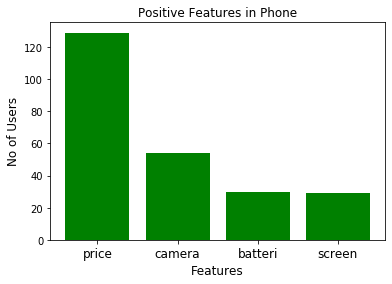

In [104]:
plot_bar_p()

## <font color=black>Coverage of Topics in Negative text.</font>

In [105]:
bow_vector = dictionary.doc2bow(preprocess(neg_str))
for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    #print("Score: {}\t Topic: {}".format(round(score*100), lda_model_tfidf.print_topic(index, 4)))
    a = dictionary.get(lda_model_tfidf.get_topic_terms(index, 4)[0]9

Topic: batteri	 Score: 97.0
Topic: screen	 Score: 72.0
Topic: camera	 Score: 49.0
Topic: price	 Score: 24.0



In [110]:
index = np.arange(len(labels_n))
def plot_bar_n():
    # this is for plotting purpose
    index = np.arange(len(labels_n))
    plt.bar(index, scores_n,color="red")
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('No of Users', fontsize=12)
    plt.xticks(index, labels_n, fontsize=12, rotation=0)
    plt.title('Negative Features in Phone')
    plt.show()

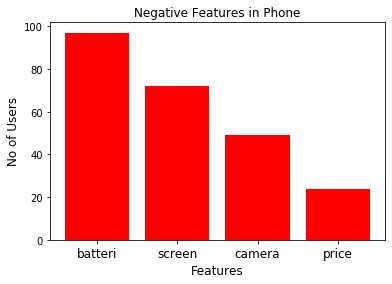

In [111]:
plot_bar_n()

_________________________________________________________________END__________________________________________________________________________